### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4
#### Клаccификация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Малашенко Марина Владимировна
##### Группа:   НФИбд-01-20

## Москва 2023
***

### Вариант №_1_

Вариант 1 

Annealing Data Set 

Название файла: anneal.data 

Ссылка: https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/ 

Первый признак: thick (столбец No 33) 

Второй признак: width (столбец No 34) 

Третий признак: len (столбец No 35) 

Класс: classes (столбец No 39) 

Метод обработки пропущенных значений – среднее значение признака  

Метод нормализации признаков – масштабирование на интервал [0, 1]  

Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией  

Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 10 блокам  

Показатель качества модели – индекс Жаккара  

##### 1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# данные из репозитария UCI
url = \
    "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"

In [6]:
# считываем данные в объект DataFrame
my_data = pd.read_csv( url, header=None )
my_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [7]:
my_data = my_data[[32,33,34,38]]
my_data

,32,33,34,38
0,0.700,610.0,0,3
1,3.200,610.0,0,3
2,0.700,1300.0,762,3
3,2.801,385.1,0,3
4,0.801,255.0,269,3
...,...,...,...,...
793,1.001,50.0,0,3
794,0.699,1300.0,4880,3
795,0.400,609.9,0,3
796,3.200,610.0,4880,3


##### 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score) . Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов. 

In [8]:
# согласно проверке и данным на сайте, в датасете присуствуют пропущенные значения признаков

my_data.replace(0, np.nan, inplace=True)

print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Пропущенных значений:
	32: 0
	33: 1
	34: 371
	38: 0


По варианту 1: Метод обработки пропущенных значений – среднее значение признака  

In [9]:
my_data.fillna(my_data.mean(), inplace=True)

In [10]:
print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Пропущенных значений:
	32: 0
	33: 0
	34: 0
	38: 0


In [11]:
my_data

,32,33,34,38
0,0.700,610.0,2379.119438,3
1,3.200,610.0,2379.119438,3
2,0.700,1300.0,762.000000,3
3,2.801,385.1,2379.119438,3
4,0.801,255.0,269.000000,3
...,...,...,...,...
793,1.001,50.0,2379.119438,3
794,0.699,1300.0,4880.000000,3
795,0.400,609.9,2379.119438,3
796,3.200,610.0,4880.000000,3


In [12]:
# количество различных меток классов превышает 4
unique_values_count = my_data.iloc[:, -1].nunique()
unique_values_count

5

In [13]:
# найдем самую редкую метку класса
rare_value = my_data.iloc[:, -1].value_counts().index[-1]
rare_value

'1'

In [14]:
# подсчитаем частоту самой редкой метки класса
count_1 = my_data.iloc[:, -1].eq('1').sum()
count_1

8

In [15]:
# подсчитаем частоту буквенной метки класса
count_U = my_data.iloc[:, -1].eq('U').sum()
count_U

34

In [16]:
# заменим буквенную метку класса на самую редкую, потому что буквы будет невозможно промасштабировать на интервал
my_data.iloc[:, -1].replace('U', '1', inplace=True)

In [17]:
# количество различных меток классов больше не превышает 4
unique_values_count = my_data.iloc[:, -1].nunique()
unique_values_count

4

##### 3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании. 

По варианту 1: Метод нормализации признаков – масштабирование на интервал [0, 1]   

In [18]:
X = my_data
X = np.array(X, dtype=float)

In [19]:
# масштабирование на [0,1]
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))
X[:,2] = (X[:,2] - np.min(X[:,2])) / (np.max(X[:,2]) - np.min(X[:,2]))
X

array([[0.12      , 0.39202658, 0.48741944, 3.        ],
       [0.78666667, 0.39202658, 0.48741944, 3.        ],
       [0.12      , 0.85049834, 0.15597458, 3.        ],
       ...,
       [0.04      , 0.39196013, 0.48741944, 3.        ],
       [0.78666667, 0.39202658, 1.        , 3.        ],
       [0.35973333, 0.9833887 , 0.85447838, 2.        ]])

##### 4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

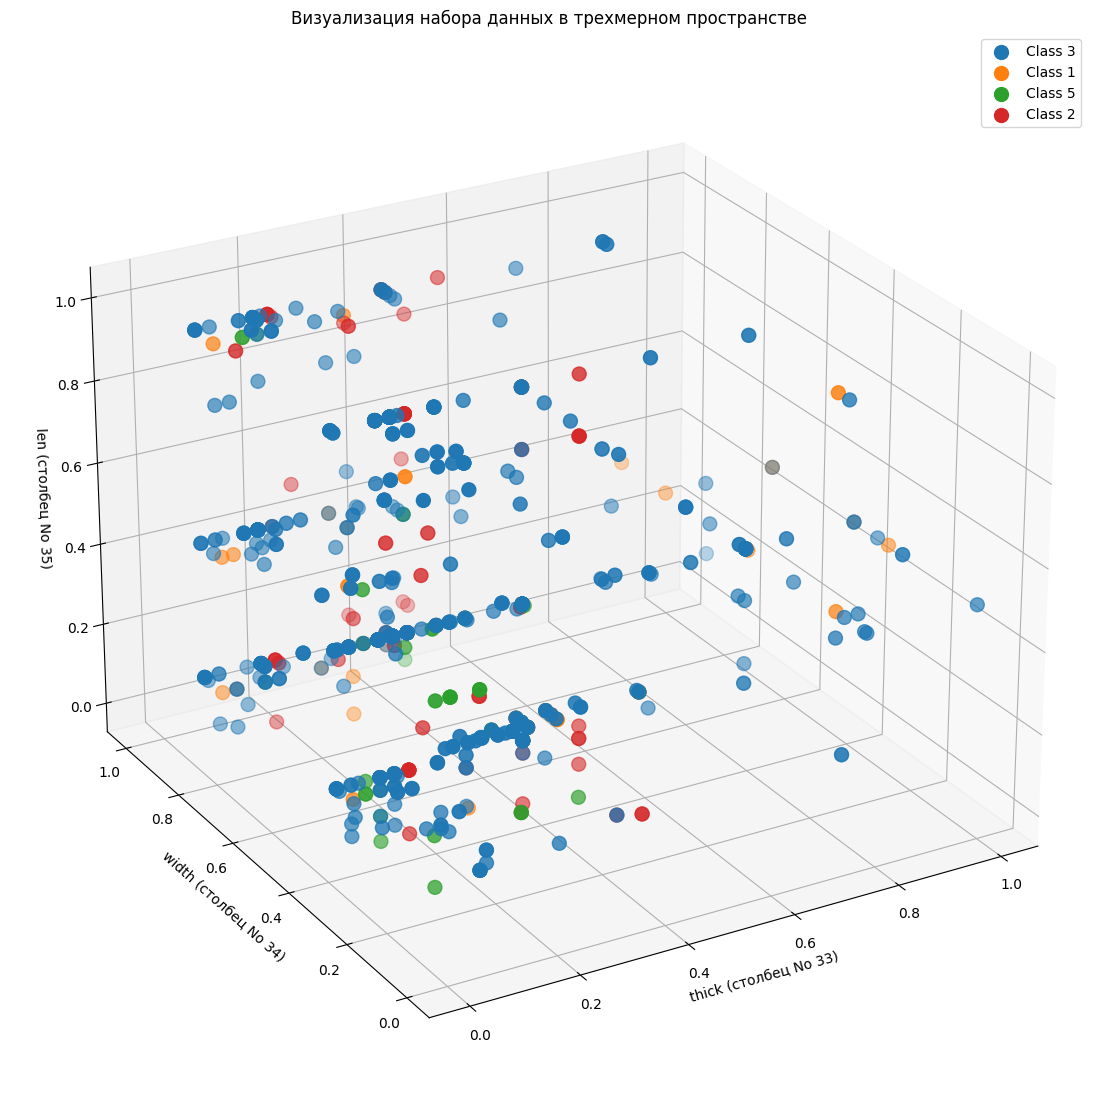

In [21]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
y = my_data[38].astype(int)

for i in (y.unique()):
    row_ix = np.where(y == i)
    a = X[row_ix, 0]
    b = X[row_ix, 1]
    c = X[row_ix, 2]
    ax.scatter(a, b, c, s=100, label=f'Class {i}')  # изменение подписи в легенде

ax.set_xlabel('thick (столбец No 33)')
ax.set_ylabel('width (столбец No 34)')
ax.set_zlabel('len (столбец No 35)')

plt.title('Визуализация набора данных в трехмерном пространстве')
plt.legend()

# настройка видового угла
ax.view_init( azim=-120, elev=25 );
plt.show()

##### 5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

По варианту 1: Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией  

In [22]:
# сохраним для 8го пункта набор данных с тремя признаками
X3 = X
X3

array([[0.12      , 0.39202658, 0.48741944, 3.        ],
       [0.78666667, 0.39202658, 0.48741944, 3.        ],
       [0.12      , 0.85049834, 0.15597458, 3.        ],
       ...,
       [0.04      , 0.39196013, 0.48741944, 3.        ],
       [0.78666667, 0.39202658, 1.        , 3.        ],
       [0.35973333, 0.9833887 , 0.85447838, 2.        ]])

In [23]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.06 * (1 - .06)))
sel.fit_transform(X)

array([[0.39202658, 0.48741944, 3.        ],
       [0.39202658, 0.48741944, 3.        ],
       [0.85049834, 0.15597458, 3.        ],
       ...,
       [0.39196013, 0.48741944, 3.        ],
       [0.39202658, 1.        , 3.        ],
       [0.9833887 , 0.85447838, 2.        ]])

In [24]:
# признак с самой низкой дисперсией - первый. удаляем.
X = X[:, 1:]
X

array([[0.39202658, 0.48741944, 3.        ],
       [0.39202658, 0.48741944, 3.        ],
       [0.85049834, 0.15597458, 3.        ],
       ...,
       [0.39196013, 0.48741944, 3.        ],
       [0.39202658, 1.        , 3.        ],
       [0.9833887 , 0.85447838, 2.        ]])

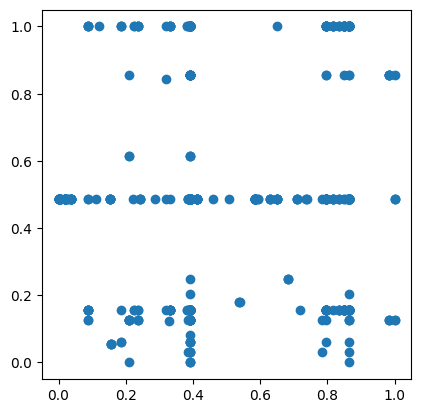

In [25]:
# черновик графика на плоскости для сверки
plt.scatter(X[:,0], X[:,1])
plt.axis('square')
plt.show()

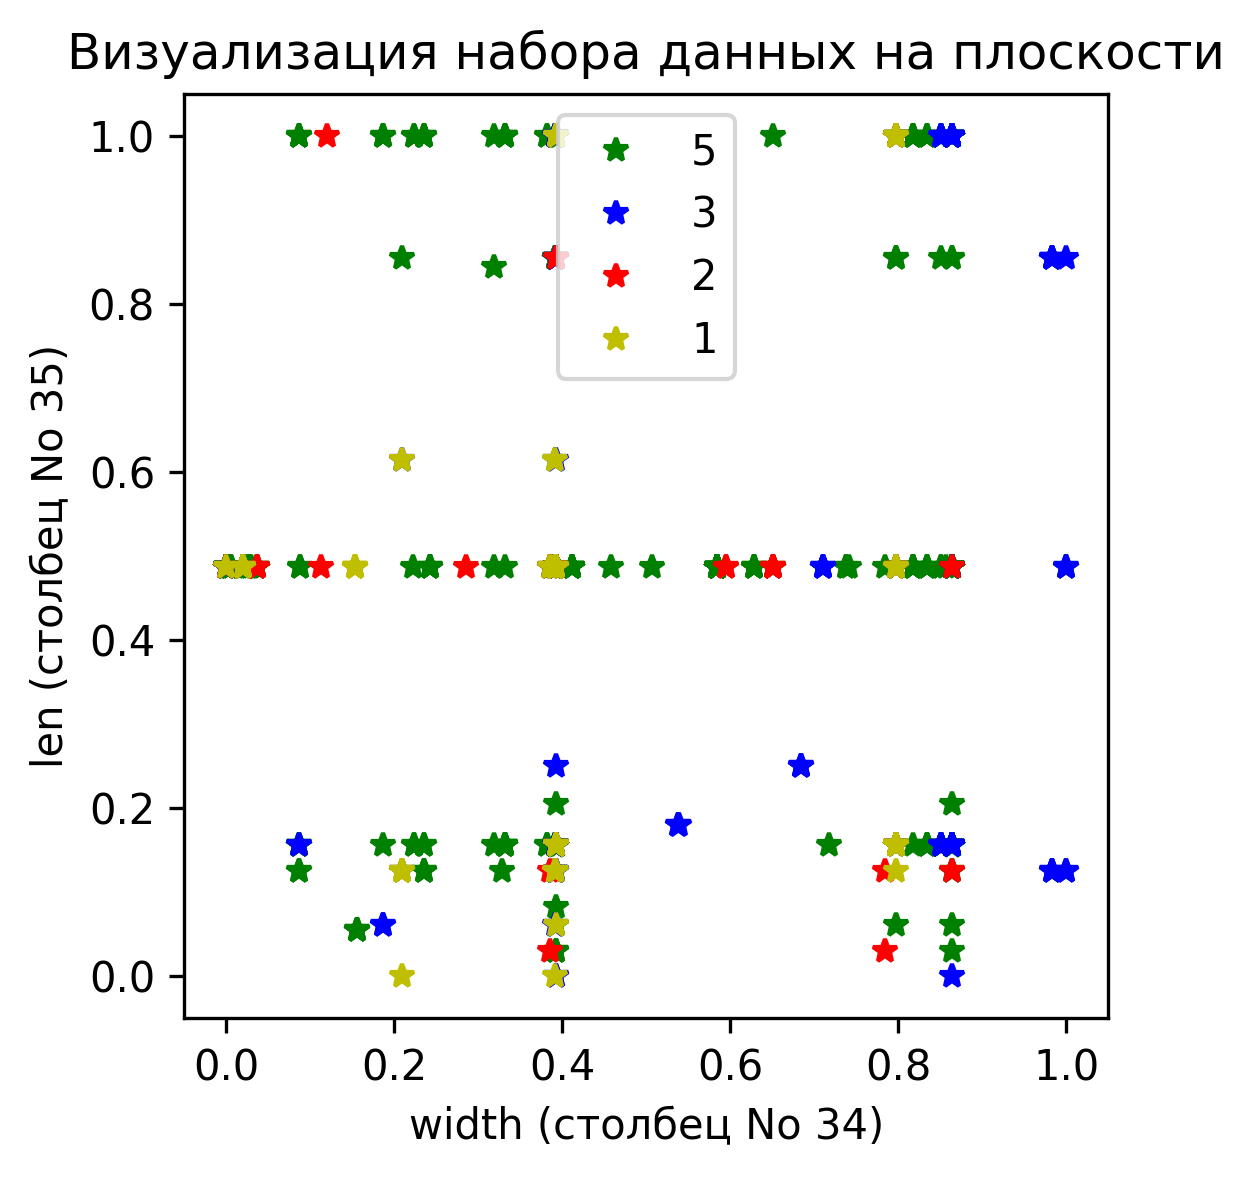

In [26]:
plt.figure( figsize=(4, 4), dpi=300 )

plt.plot(X[:,:2][y==3,0],
    X[:,:2][y==3,1],"g*",label='5') # class 5

plt.plot(X[:,:2][y==2,0],
    X[:,:2][y==2,1],"b*",label='3') # class 3

plt.plot(X[:,:2][y==1,0],
    X[:,:2][y==1,1],"r*",label='2') # class 2

plt.plot(X[:,:2][y==5,0],
    X[:,:2][y==5,1],"y*",label='1') # class 1

plt.title('Визуализация набора данных на плоскости')
plt.xlabel('width (столбец No 34)')
plt.ylabel('len (столбец No 35)')
plt.legend()
plt.axis('square')
plt.show()

##### 6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок. 

In [27]:
X = X[:, :-1]
X

array([[0.39202658, 0.48741944],
       [0.39202658, 0.48741944],
       [0.85049834, 0.15597458],
       ...,
       [0.39196013, 0.48741944],
       [0.39202658, 1.        ],
       [0.9833887 , 0.85447838]])

In [28]:
y.shape, X.shape

((798,), (798, 2))

In [29]:
# разделение на обучающую и тестовые выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((598, 2), (598,), (200, 2), (200,))

In [31]:
# классификация тестовой выборки

from sklearn.neighbors import KNeighborsClassifier

min_err = 1
best_k = -1

for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    err = round(np.mean(y_pred!=y_test),3)
    if err < min_err:
        best_k = k
        min_err = err
        
print("Оптимальное k =", best_k)
print("Минимальная доля ошибок =", min_err)

Оптимальное k = 6
Минимальная доля ошибок = 0.22


##### 7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок. 

In [32]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[  0   1  10   0]
 [  0   2  19   0]
 [  1   3 153   0]
 [  0   1   9   1]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.29      0.10      0.14        21
           3       0.80      0.97      0.88       157
           5       1.00      0.09      0.17        11

    accuracy                           0.78       200
   macro avg       0.52      0.29      0.30       200
weighted avg       0.71      0.78      0.71       200



##### 8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов: 

• наивного байесовского классификатора 

• классификатора метода К ближайших соседей для значения К, определенного в п. 6. 

In [35]:
X3 = X3[:, :-1]
X3

array([[0.12      , 0.39202658, 0.48741944],
       [0.78666667, 0.39202658, 0.48741944],
       [0.12      , 0.85049834, 0.15597458],
       ...,
       [0.04      , 0.39196013, 0.48741944],
       [0.78666667, 0.39202658, 1.        ],
       [0.35973333, 0.9833887 , 0.85447838]])

In [36]:
# разделение на обучающую и тестовые выборки

X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y, test_size=0.25)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((598, 3), (598,), (200, 3), (200,))

In [37]:
# модель классификации на базе наивного байесовского классификатора

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train2,y_train2)
y_pred2 = nbc.predict(X_test2)

In [38]:
# модель на базе классификатора метода K ближайших соседей для k = 6

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train2, y_train2)
y_pred3 = knn.predict(X_test2)

##### 9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя. 

По варианту 1: Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 10 блокам,
Показатель качества модели – индекс Жаккара   

In [39]:
from sklearn.model_selection import cross_val_score

Валидация модели:

In [40]:
# Repeated Random Test-Train Splits
from sklearn.model_selection import ShuffleSplit

kfold_split = ShuffleSplit(n_splits=10, test_size=0.25)

Оценка качества наивного байесовского классификатора:

In [41]:
results_kfold_split_nbc = cross_val_score(nbc, X3, y, scoring='jaccard_macro', cv=kfold_split)

In [42]:
print("Среднее значение (дисперсия): %.2f (%.2f)" % (results_kfold_split_nbc.mean(), 
                                     results_kfold_split_nbc.std())) 

Среднее значение (дисперсия): 0.20 (0.02)


Оценка качества классификатора метода K ближайших соседей:

In [43]:
results_kfold_split_knn = cross_val_score(knn, X3, y, scoring='jaccard_macro', cv=kfold_split)

In [44]:
print("Среднее значение (дисперсия): %.2f (%.2f)" % (results_kfold_split_knn.mean(), 
                                     results_kfold_split_knn.std()))

Среднее значение (дисперсия): 0.32 (0.03)


##### 10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

Классификатор метода K ближайших соседей ползволяет получить более высокое среднее значение показателя классификации

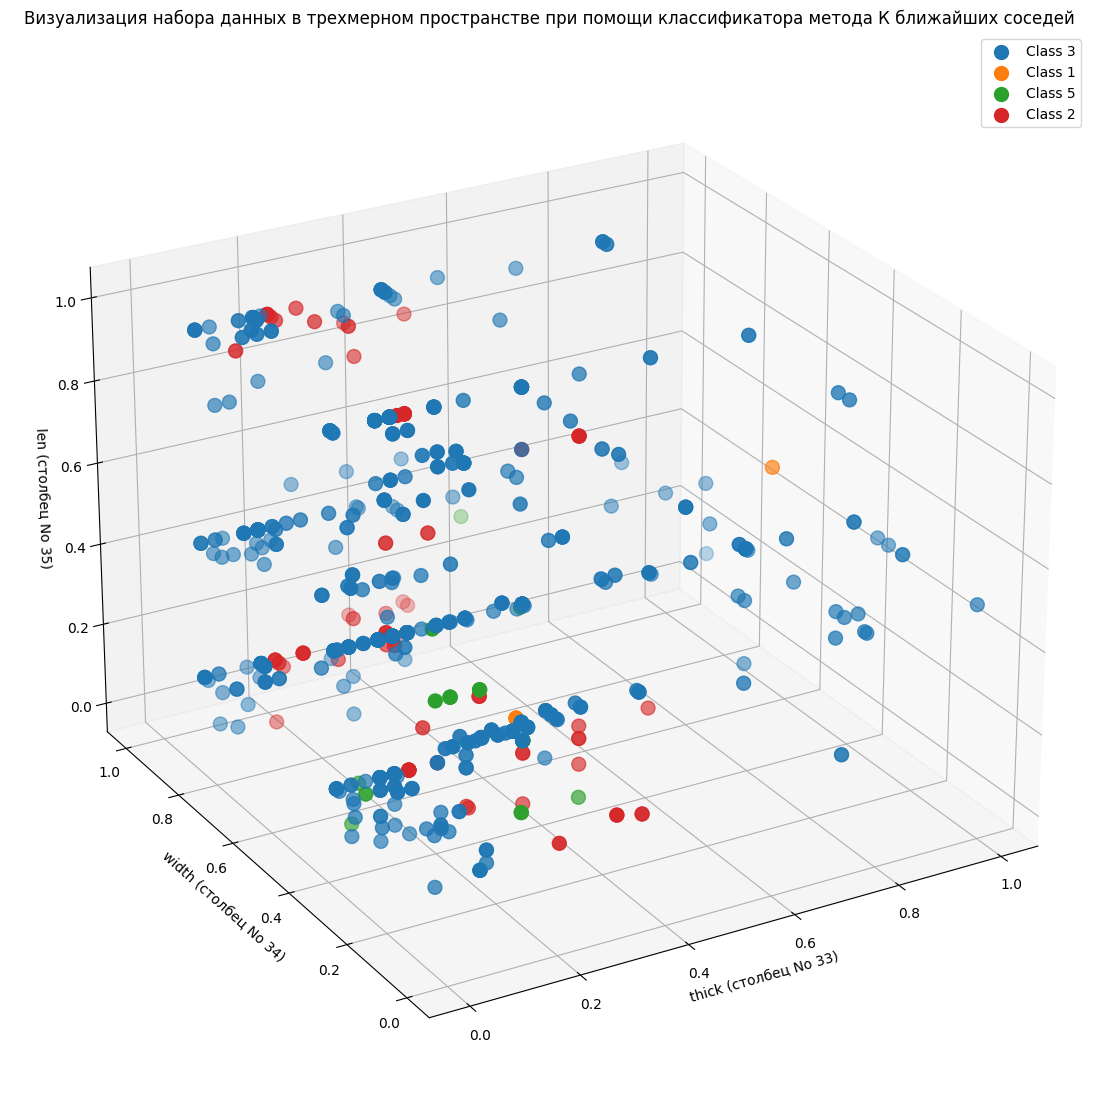

In [45]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')

y = knn.predict(X3)

for i in ([3,1,5,2]):
    row_ix = np.where(y == i)
    a = X3[row_ix, 0]
    b = X3[row_ix, 1]
    c = X3[row_ix, 2]
    ax.scatter(a, b, c, s=100, label=f'Class {i}')  # изменение подписи в легенде

ax.set_xlabel('thick (столбец No 33)')
ax.set_ylabel('width (столбец No 34)')
ax.set_zlabel('len (столбец No 35)')

plt.title('Визуализация набора данных в трехмерном пространстве при помощи классификатора метода К ближайших соседей')
plt.legend()

# настройка видового угла
ax.view_init( azim=-120, elev=25 );
plt.show()